<a href="https://colab.research.google.com/github/navaneethsdk/Pytorch-Projects/blob/master/PyTorchLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# These are the libraries will be used for this lab.

import torch

In [ ]:
# Define w = 2 and b = -1 for y = wx + b

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

In [ ]:
# Function forward(x) for prediction

def forward(x):
    yhat = w * x + b
    return yhat

In [ ]:
# Predict y = 2x - 1 at x = 1

x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


In [ ]:
# Create x Tensor and check the shape of x tensor

x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


In [ ]:
# Make the prediction of y = 2x - 1 at x = [1, 2]

yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


Class Linear

In [ ]:
# Import Class Linear

from torch.nn import Linear

In [ ]:
# Set random seed

torch.manual_seed(1)

In [ ]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))

Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
# Make the prediction at x = [[1.0]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


In [ ]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


Custom Modules

In [ ]:
# Library for this section

from torch import nn

In [ ]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.2057]], requires_grad=True), Parameter containing:
tensor([0.5087], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [ ]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward>)


In [ ]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward>)


# **Linear Regression 1D: Training One Parameter**

In [ ]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [ ]:
# Import the library PyTorch

import torch

In [ ]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

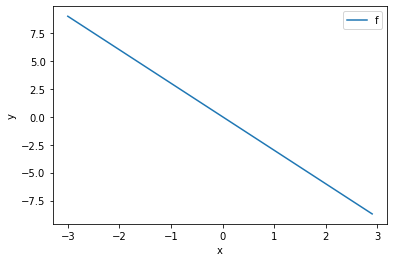

In [ ]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

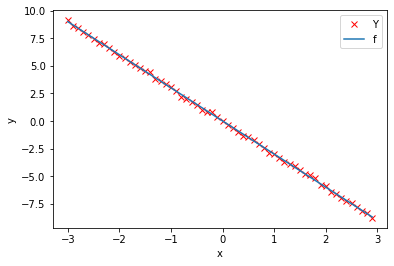

In [ ]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Create forward function for prediction

def forward(x):
    return w * x

In [ ]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [ ]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [ ]:
#Now, we create a model parameter by setting the argument requires_grad to  True because the system must learn it.
w = torch.tensor(-10.0, requires_grad = True)

In [ ]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [ ]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

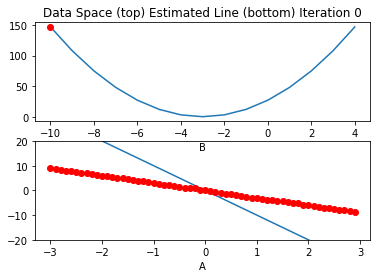

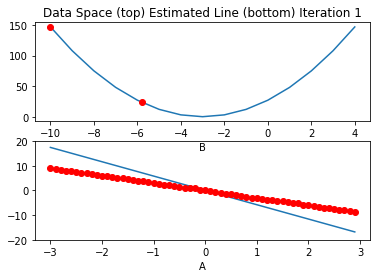

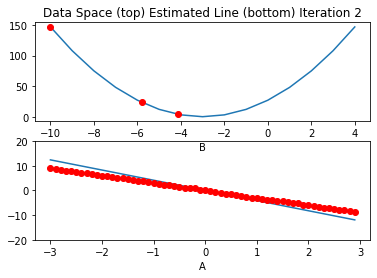

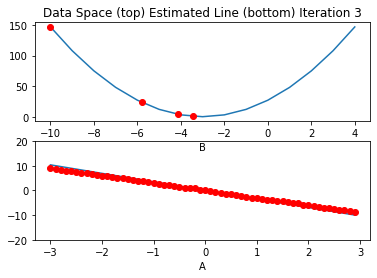

<Figure size 432x288 with 0 Axes>

In [ ]:
# Give 4 iterations for training the model here.

train_model(4)

In [ ]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

# **Linear regression 1D: Training Two Parameter**

In [ ]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [ ]:
# Import PyTorch library

import torch

In [ ]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

In [ ]:
# Add noise

Y = f + 0.1 * torch.randn(X.size())

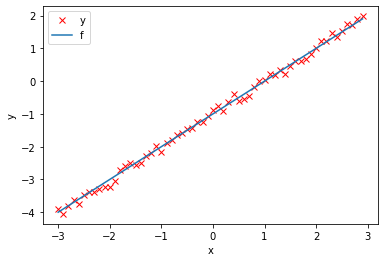

In [ ]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# Define the forward function

def forward(x):
    return w * x + b

In [ ]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

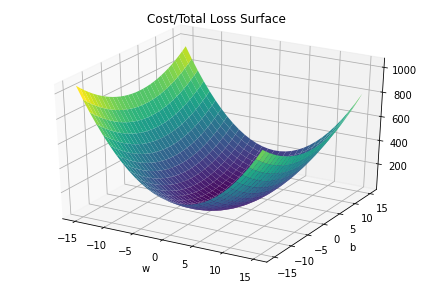

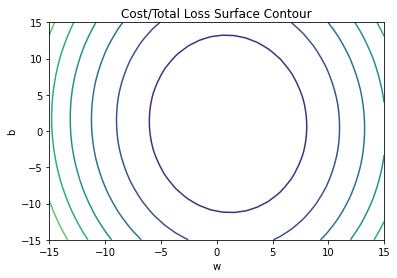

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [ ]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)


In [ ]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [ ]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

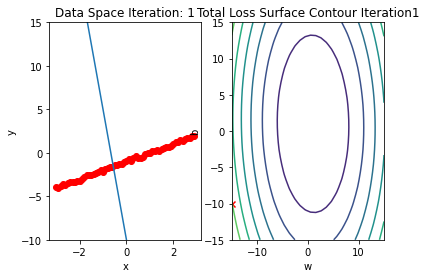

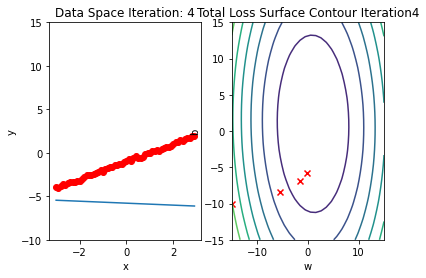

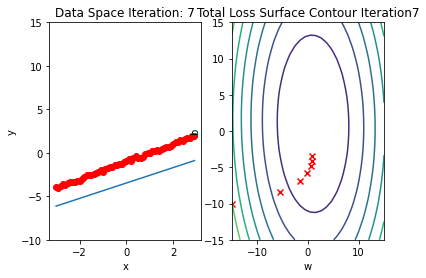

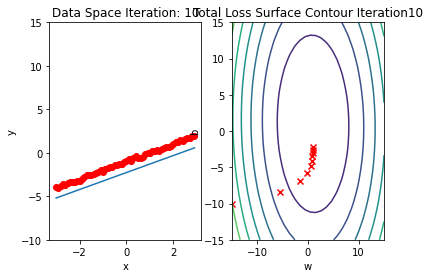

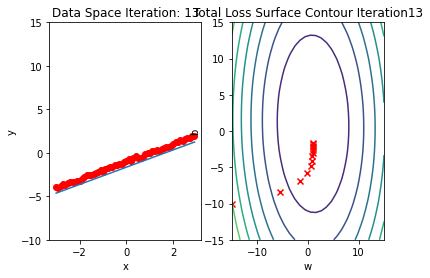

In [ ]:
# Train the model with 15 iterations

train_model(15)

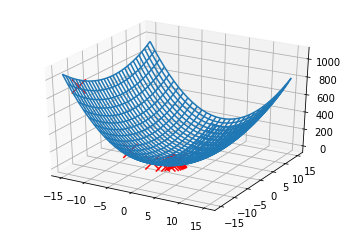

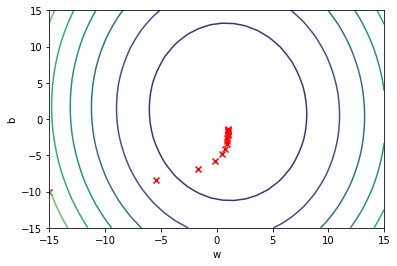

Text(24.125, 0.5, 'Cost')

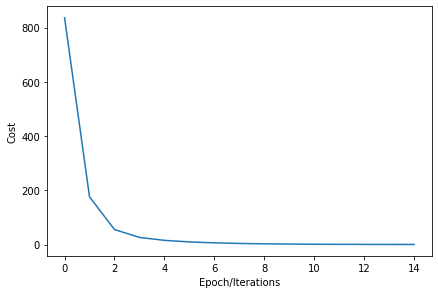

In [ ]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")